/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Accuracy: 1.00
Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


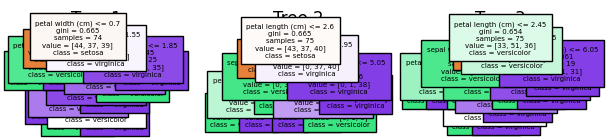

In [12]:
#Q-2 Random Forest Classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

rf_classifier=RandomForestClassifier(n_estimators=3,oob_score=True,random_state=42)
rf_classifier.fit(X_train,y_train)

y_pred=rf_classifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_mat=confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(conf_mat)

plt.figure(figsize=(10,6))
for i,tree in enumerate(rf_classifier.estimators_):
  plt.subplot(5,5,i+1)
  plot_tree(tree,filled=True,feature_names=iris.feature_names,class_names=iris.target_names,fontsize=5)
  plt.title(f'Tree {i+1}')
plt.tight_layout()
plt.show()

Accuracy: 0.00


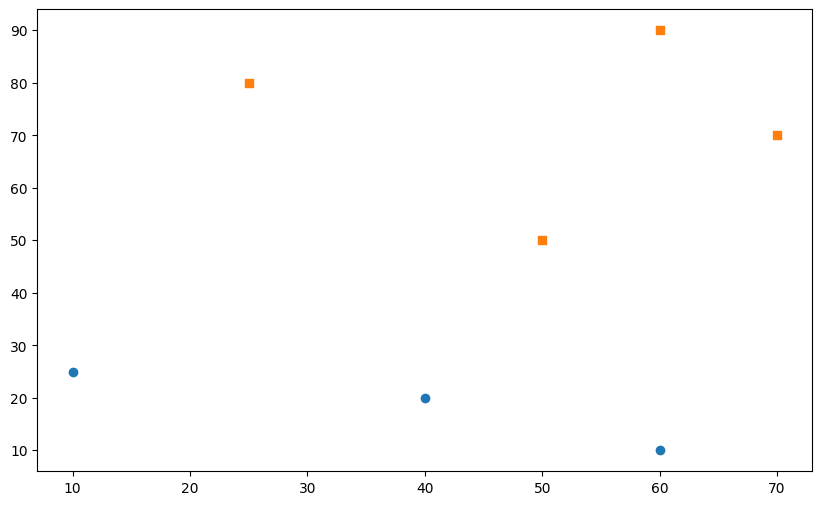

In [31]:
#3.knn classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

data=np.array([
    [40,20,'Red'],
    [50,50,'Blue'],
    [60,90,'Blue'],
    [10,25,'Red'],
    [70,70,'Blue'],
    [60,10,'Red'],
    [25,80,'Blue']
])

X=data[:,:-1].astype(float)
y=data[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

k=5
knn_classifier=KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train,y_train)
y_pred=knn_classifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

plt.figure(figsize=(10,6))
markers={'Red':'o','Blue':'s'}
for label in set(y):
  indices=np.where(y==label)
  plt.scatter(X[indices,0],X[indices,1],label=label,marker=markers[label])

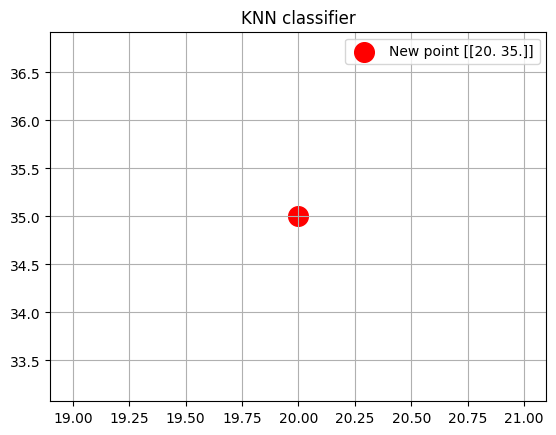

In [34]:
new_point=np.array([[20,35]]).astype(float)
pred_label=knn_classifier.predict(new_point)
pred_label

plt.scatter(new_point[:,0],new_point[:,1],s=200,c='red',label=f'New point {new_point}')
plt.legend()
plt.title('KNN classifier')
plt.grid(True)
plt.show()

Accuracy: 0.67


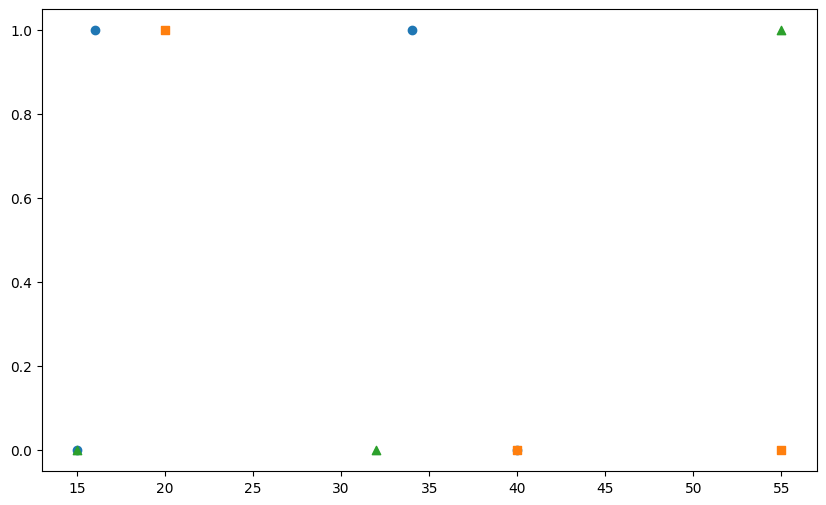

In [52]:
# 4. knn classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

data=np.array([
    ['Ajay',32,0,'Football'],
    ['Mark',40,0,'Neither'],
    ['Sara',16,1,'Cricket'],
    ['Zaira',34,1,'Cricket'],
    ['Sachin',55,0,'Neither'],
    ['Rahul',40,0,'Cricket'],
    ['Pooja',20,1,'Neither'],
    ['Smith',15,0,'Cricket'],
    ['Laxmi',55,1,'Football'],
    ['Mitchell',15,0,'Football']
])
data
X=data[:,1:-1].astype(float)
y=data[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,y_train)

y_pred=knn_classifier.predict(X_test)
y_pred

accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

plt.figure(figsize=(10,6))
markers={'Cricket':'o','Neither':'s','Football':'^'}
for label in set(y):
  indices=np.where(y==label)
  plt.scatter(X[indices,0],X[indices,1],label=label,marker=markers[label])


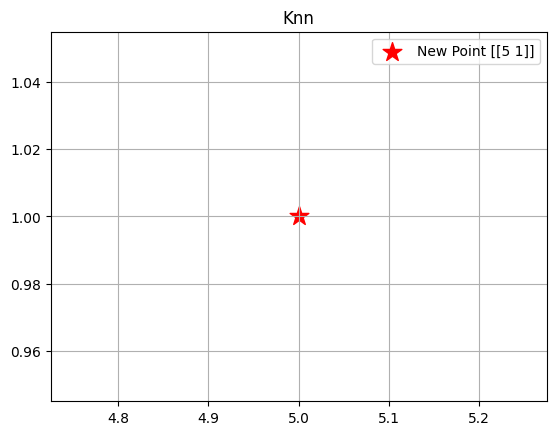

In [56]:
new_point=np.array([[5,1]])
pred_label=knn_classifier.predict(new_point)
pred_label

plt.scatter(new_point[:,0],new_point[:,1],marker='*',s=200,c='red',label=f'New Point {new_point}')
plt.legend()
plt.title('Knn')
plt.grid(True)
plt.show()

MSE: 30.50
r2: -3.88


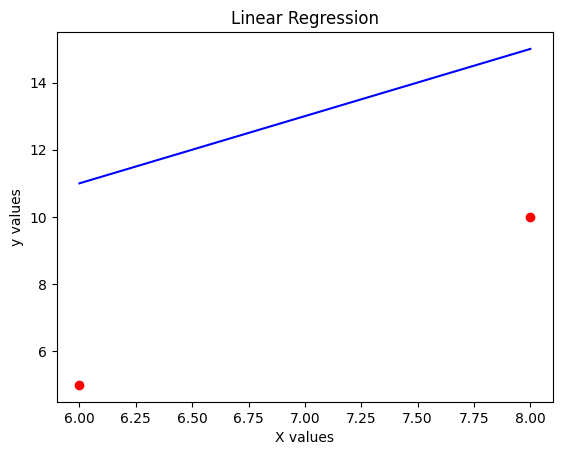

In [71]:
#Q-5 Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

data=np.array([
    [2,3],
    [4,7],
    [6,5],
    [8,10]
])

X=data[:,:1]
y=data[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse:.2f}')
print(f'r2: {r2:.2f}')

plt.scatter(X_test,y_test,color='red',label='Acutal Data')
plt.plot(X_test,y_pred,color='blue',label='line')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Linear Regression')
plt.show()

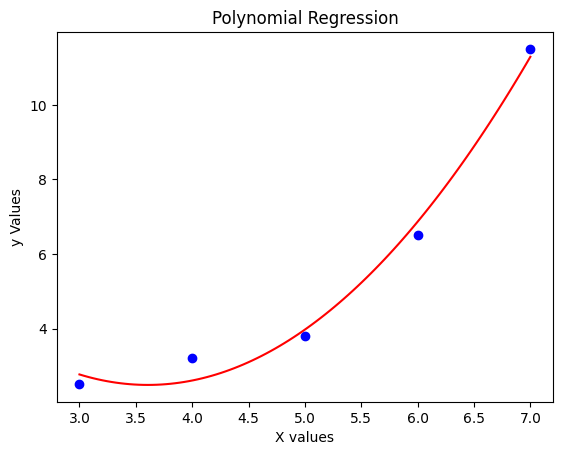

In [88]:
#Q-7 Polynomial Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data=np.array([
    [3,2.5],
    [4,3.2],
    [5,3.8],
    [6,6.5],
    [7,11.5]
])

X=data[:,:-1]
y=data[:,-1]

deg=2
poly_feat=PolynomialFeatures(degree=deg)
X_poly=poly_feat.fit_transform(X)

poly_reg=LinearRegression()
poly_reg.fit(X_poly,y)

X_range=np.linspace(X.max(),X.min(),100).reshape(-1,1)
X_range_poly=poly_feat.transform(X_range)

y_pred=poly_reg.predict(X_range_poly)

plt.scatter(X,y,label='Data Points',color='blue')
plt.plot(X_range,y_pred,label=f'Polynomial Regression (degree={deg})',color='red')
plt.xlabel('X values')
plt.ylabel('y Values')
plt.title('Polynomial Regression')
plt.show()

In [109]:
#Q-8 SVD
import numpy as np
from numpy.linalg import norm,eigh

A=np.array([[2,0,0],
    [2,1,0],
    [0,-2,0]])
A

ATA=A.T.dot(A)
ATA

eighvalues_ATA,eighvectors_ATA=eigh(ATA)
eighvalues_ATA,eighvectors_ATA

sorted_indices=np.argsort(eighvalues_ATA)[::-1]
eighvalues_ATA=eighvalues_ATA[sorted_indices]
eighvectors_ATA=eighvectors_ATA[sorted_indices]
eighvalues_ATA,eighvectors_ATA

singular_value=np.sqrt(eighvalues_ATA)
singular_value

s=np.zeros_like(A,dtype=float)
s[:A.shape[0],:A.shape[1]]=np.diag(singular_value)
s[:A.shape[0],:A.shape[1]]

u=A.dot(eighvectors_ATA)
u/=norm(u,axis=0)
vt=eighvectors_ATA.T

u

vt

s

u

array([[ 0.70710678,  0.        ,  0.        ],
       [ 0.70710678, -0.4472136 , -0.4472136 ],
       [ 0.        ,  0.89442719,  0.89442719]])

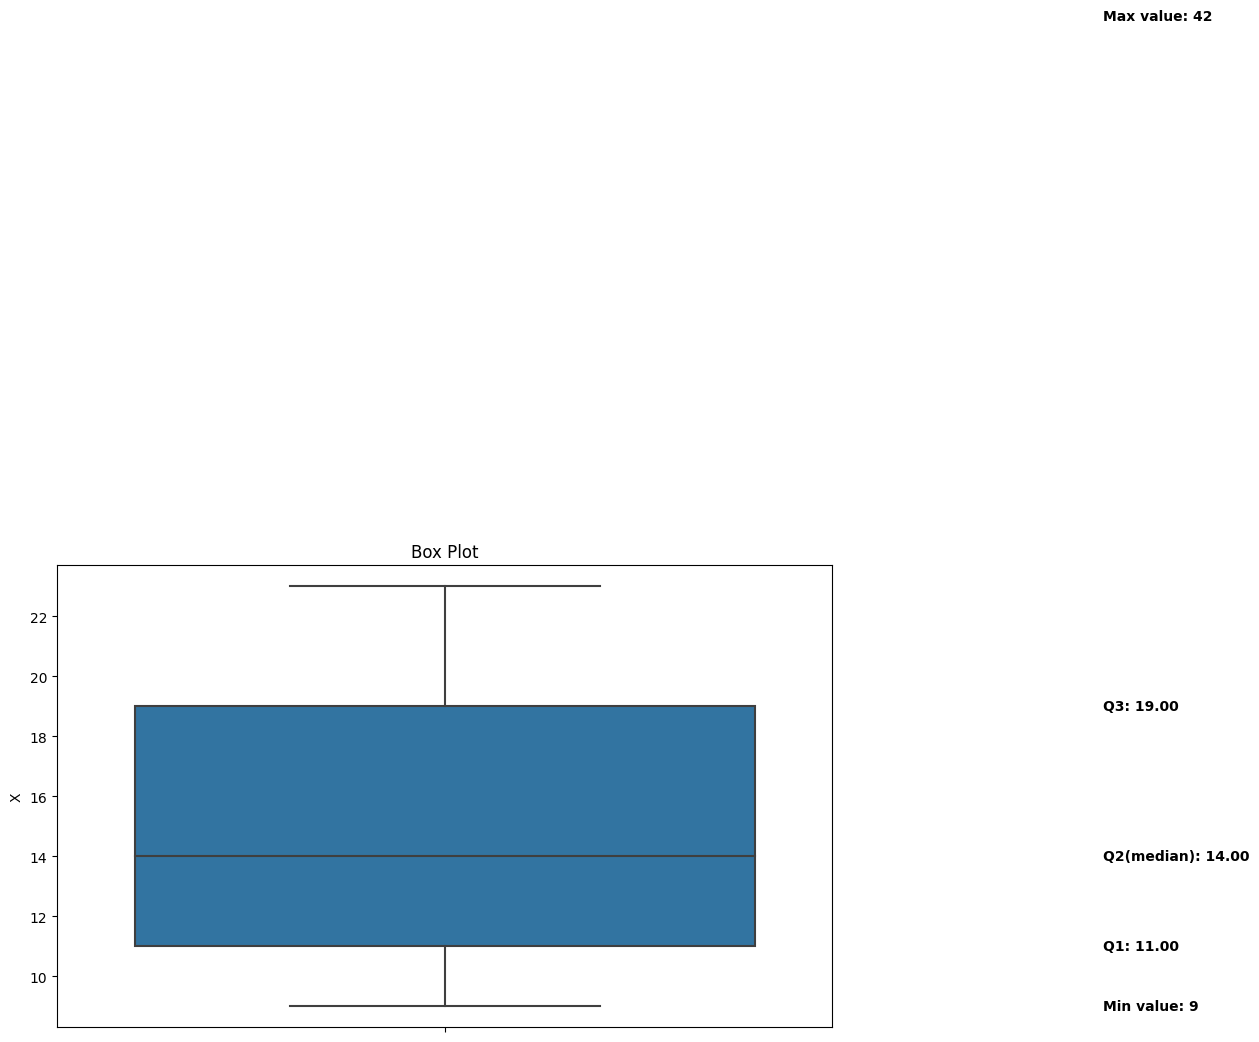

In [118]:
#Q-9 BOX PLOT QUANTILES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.DataFrame({
    'X':[23,42,12,10,15,14,9]
})

data

q1=data['X'].quantile(0.25)
q2=data['X'].quantile(0.50)
q3=data['X'].quantile(0.75)
min_value=data['X'].min()
max_value=data['X'].max()

plt.figure(figsize=(10,6))
sns.boxplot(y=data['X'],orient='v',showfliers=False)
plt.title('Box Plot')

plt.text(0.85,q1,f'Q1: {q1:.2f}',ha='left',va='center',fontweight='bold')
plt.text(0.85,q2,f'Q2(median): {q2:.2f}',ha='left',va='center',fontweight='bold')
plt.text(0.85,q3,f'Q3: {q3:.2f}',ha='left',va='center',fontweight='bold')
plt.text(0.85,min_value,f'Min value: {min_value}',ha='left',va='center',fontweight='bold')
plt.text(0.85,max_value,f'Max value: {max_value}',ha='left',va='center',fontweight='bold')

plt.show()

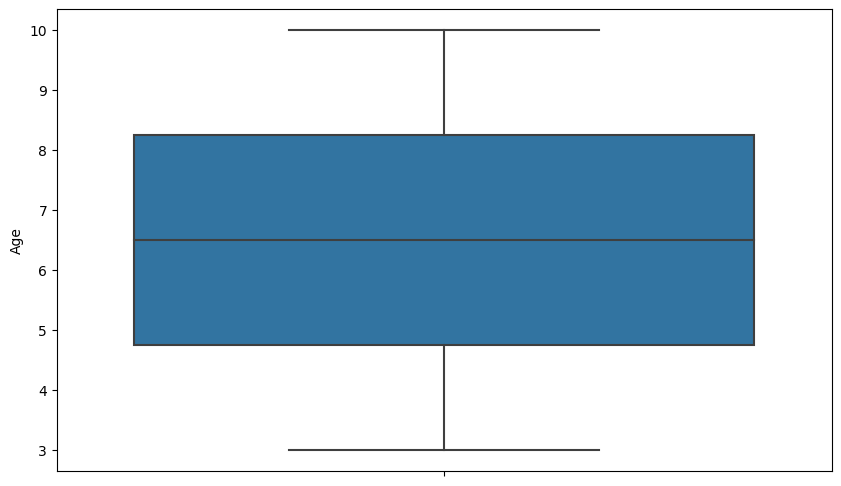

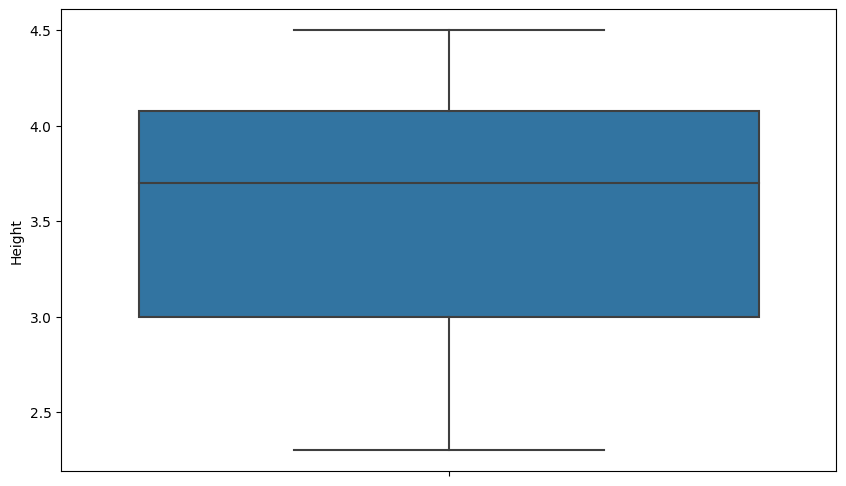

<Axes: xlabel='Age', ylabel='Height'>

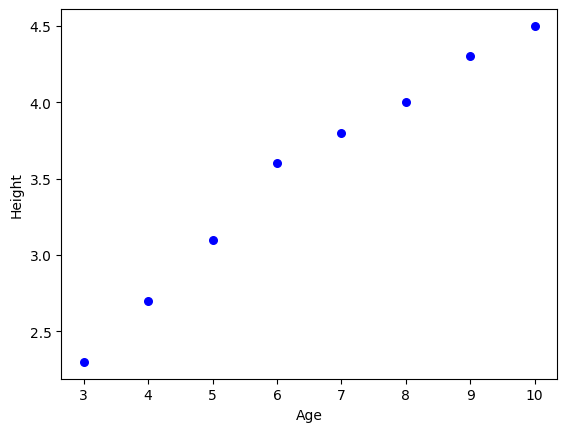

In [126]:
#10 Box plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.DataFrame({
    'Age':[3,4,5,6,7,8,9,10],
    'Height':[2.3,2.7,3.1,3.6,3.8,4,4.3,4.5]
})

plt.figure(figsize=(10,6))
sns.boxplot(y=data['Age'],orient='v')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(y=data['Height'],orient='v')
plt.ylabel('Height')
plt.show()

data.plot.scatter(x='Age',y='Height',s=30,color='blue')

In [131]:
#missing values q11
import pandas as pd
import numpy as np

df=pd.read_csv('q11.csv')
df

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(df[['Salary']])
df[['Salary']]=imputer.transform(df[['Salary']])
df

imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(df[['Gender','Country','Company']])
df[['Gender','Country','Company']]=imputer.transform(df[['Gender','Country','Company']])
df

,Id,Gender,Salary,Country,Company
0,1,Male,15000.0,India,Google
1,2,Female,45000.0,China,Google
2,3,Female,25000.0,India,Google
3,4,Male,34375.0,Australia,Google
4,5,Male,34375.0,India,Google
5,6,Male,54000.0,Australia,Alibaba
6,7,Male,74000.0,China,Google
7,8,Male,14000.0,Australia,Google
8,9,Female,15000.0,Australia,Google
9,10,Male,33000.0,Australia,Google


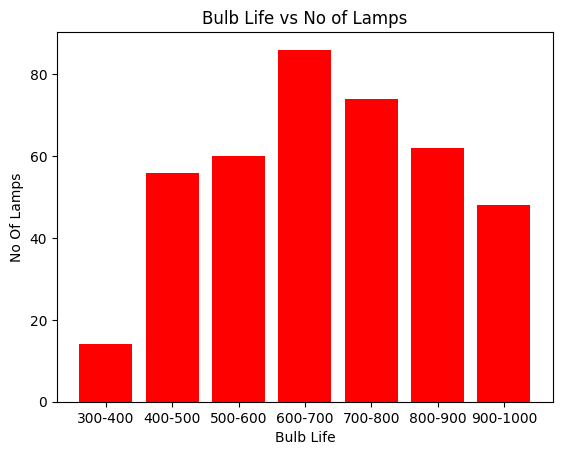

In [135]:
#q-12 Histogram
import pandas as pd
import matplotlib.pyplot as plt

data=pd.DataFrame({
    'BLife':['300-400','400-500','500-600','600-700','700-800','800-900','900-1000'],
    'NofLamps':[14,56,60,86,74,62,48]
    })

plt.bar(data['BLife'],data['NofLamps'],color='red')
plt.xlabel('Bulb Life')
plt.ylabel('No Of Lamps')
plt.title('Bulb Life vs No of Lamps')
plt.show()

Text(0, 0.5, 'component 2')

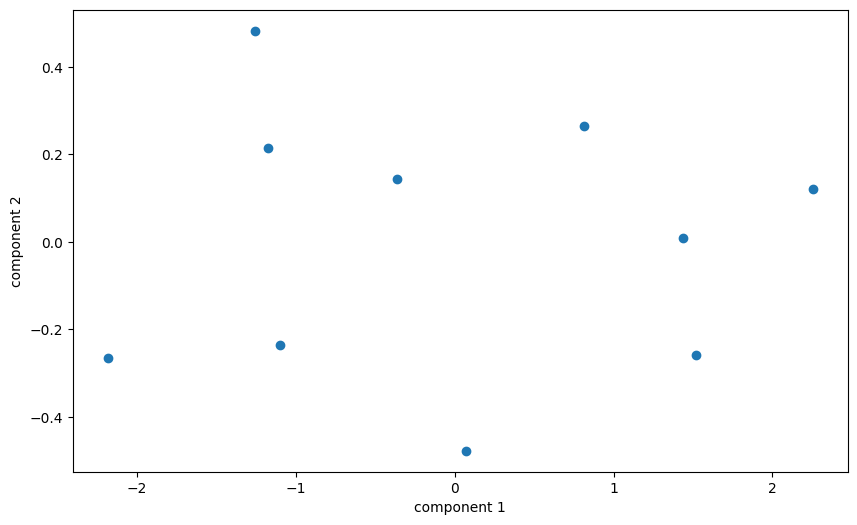

In [157]:
#q-13 PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.DataFrame({
    'x':[2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.2,1.1],
    'y':[2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
})

data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)
scaled_data=scaler.transform(data)
scaled_data

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)

X_pca=pca.transform(scaled_data)
X_pca

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel('component 1')
plt.ylabel('component 2')



<Axes: >

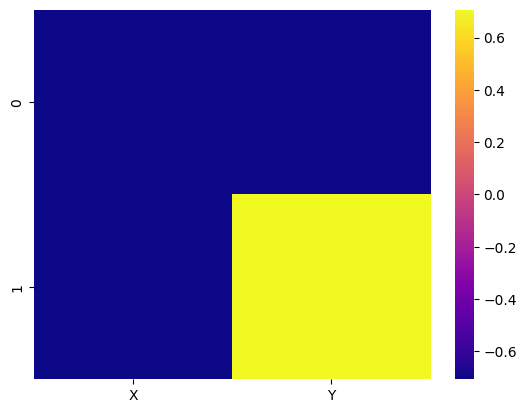

In [160]:
pca.components_

d=pd.DataFrame(pca.components_,columns=['X','Y'])
d

sns.heatmap(d,cmap='plasma')

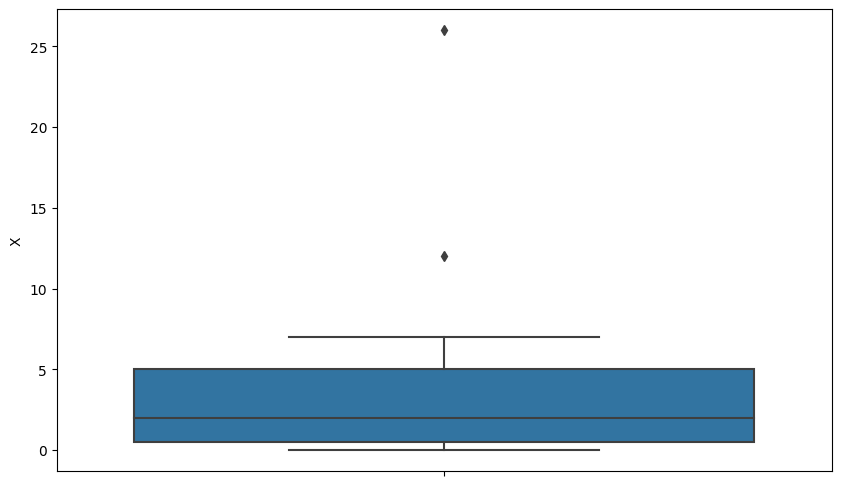

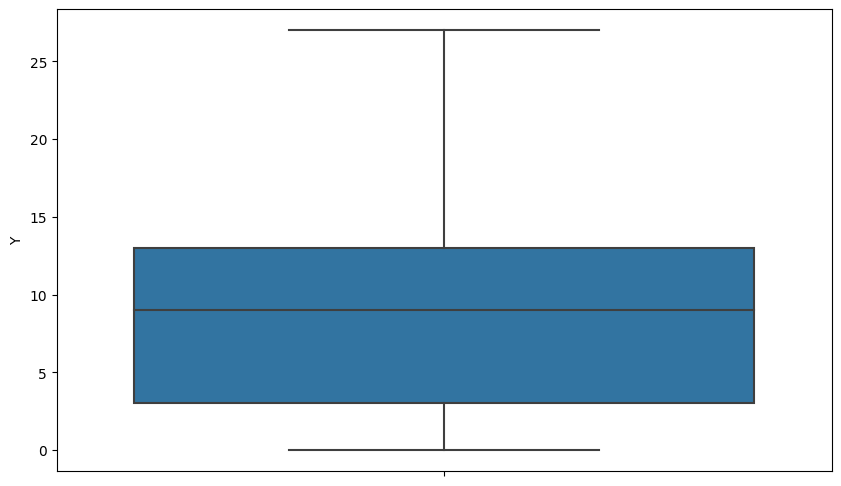

<Axes: xlabel='X', ylabel='Y'>

<Figure size 1000x600 with 0 Axes>

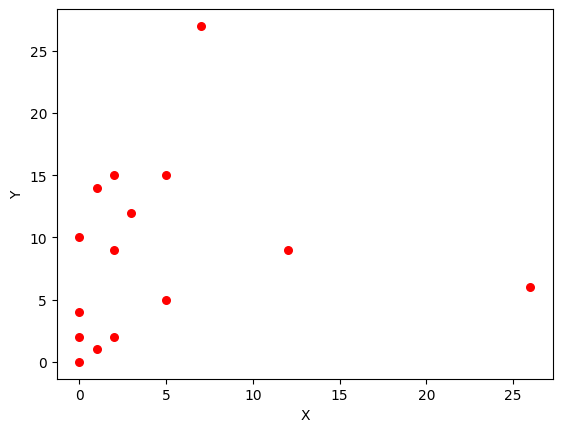

In [164]:
#q14 - box plot for individual features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.DataFrame({
    'X':[3,0,12,0,2,0,26,0,7,5,5,2,1,1,2],
    'Y':[12,0,9,4,15,2,6,10,27,15,5,9,1,14,2]
})

plt.figure(figsize=(10,6))
sns.boxplot(y=df['X'],orient='v')
plt.ylabel('X')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(y=df['Y'],orient='v')
plt.ylabel('Y')
plt.show()

plt.figure(figsize=(10,6))
df.plot.scatter(x='X',y='Y',s=30,color='red')

Mean Squared Error: 62.08
R2 Score: 0.91


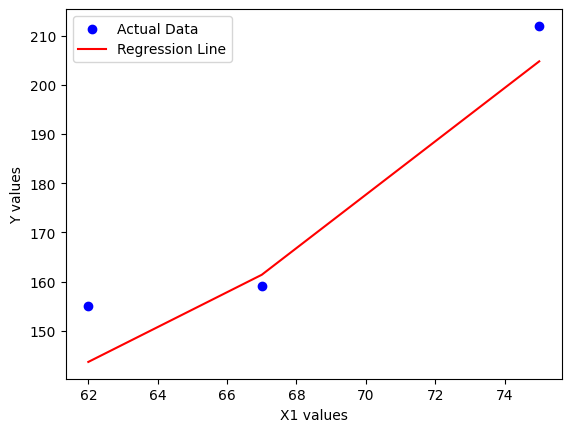

In [165]:
#Multilinear regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define the independent variables X1 and X2
X1 = np.array([60, 62, 67, 70, 71, 72, 75, 78])
X2 = np.array([22, 25, 24, 20, 15, 14, 14, 11])

# Combine the independent variables into a single feature matrix
X = np.column_stack((X1, X2))

# Define the dependent variable Y
Y = np.array([140, 155, 159, 179, 192, 200, 212, 215])

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the values on the test set
Y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared (coefficient of determination)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

# Scatter plot with the regression line
plt.scatter(X_test[:, 0], Y_test, color='blue', label='Actual Data')
plt.plot(X_test[:, 0], Y_pred, color='red', label='Regression Line')
plt.xlabel('X1 values')
plt.ylabel('Y values')
plt.legend()
plt.show()